# Imports and install catboost

In [15]:
!pip install catboost
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Initialization

In [3]:
data = pd.read_csv('heart.csv')

In [52]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# logreg

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('output', axis=1), data['output'])
X_test.dropna(inplace=True)
y_test.dropna(inplace=True)
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)

In [9]:
log_reg = LogisticRegression()

In [10]:
grid = GridSearchCV(log_reg, {'C' : np.linspace(0.001, 1, 100)}, scoring='accuracy')

In [11]:
grid.fit(data.drop('output', axis=1), data['output'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.001     , 0.0110909...
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 

In [12]:
best = grid.best_estimator_

In [13]:
best.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.13218181818181818, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# RandomForest

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf=RandomForestRegressor(n_estimators=20,random_state=0)

In [17]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [18]:
rf_pred=rf.predict(X_test)

# SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svm=SVC(kernel='sigmoid')

In [21]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
svm_pred=svm.predict(X_test)

# Results

In [23]:
accuracy_score(best.predict(X_test), y_test) #logistic regression

0.8552631578947368

In [24]:
metrics.mean_absolute_error(y_test,rf_pred) #random forest

0.2776315789473685

In [25]:
metrics.mean_squared_error(y_test,rf_pred) #random forest

0.14421052631578946

# CatBoostClassifier



In [4]:
from catboost import CatBoostClassifier

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('output', axis=1), data['output'])
X_test.dropna(inplace=True)
y_test.dropna(inplace=True)
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)

In [10]:
model=CatBoostClassifier(iterations = 10, depth = 5)

In [11]:
model.fit(X_train,y_train)

Learning rate set to 0.373213
0:	learn: 0.5796722	total: 48.3ms	remaining: 434ms
1:	learn: 0.5021139	total: 49ms	remaining: 196ms
2:	learn: 0.4565639	total: 49.8ms	remaining: 116ms
3:	learn: 0.4235711	total: 50.5ms	remaining: 75.8ms
4:	learn: 0.3941074	total: 51.2ms	remaining: 51.2ms
5:	learn: 0.3722644	total: 51.9ms	remaining: 34.6ms
6:	learn: 0.3553211	total: 52.6ms	remaining: 22.5ms
7:	learn: 0.3391938	total: 53.3ms	remaining: 13.3ms
8:	learn: 0.3258237	total: 54ms	remaining: 6ms
9:	learn: 0.3155273	total: 54.7ms	remaining: 0us


In [12]:
roc_auc_score(y_test,model.predict(X_test))

0.7625088090204369

# Graphs using 'plotly.graph_objects'

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

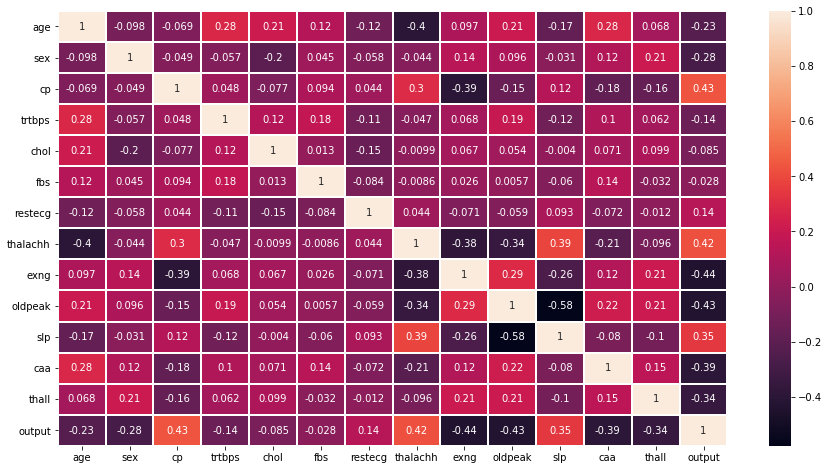

In [18]:
plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 1)
plt.show()

In [27]:
import plotly.express as px
import plotly.graph_objects as Figure

In [28]:
Age_18_25 = data.age[(data.age >= 18) & (data.age <= 25)]
Age_26_35 = data.age[(data.age >= 26) & (data.age <= 35)]
Age_36_45 = data.age[(data.age >= 36) & (data.age <= 45)]
Age_46_55 = data.age[(data.age >= 46) & (data.age <= 55)]
Age_56_65 = data.age[(data.age >= 56) & (data.age <= 65)]
Age_66_75 = data.age[(data.age >= 66) & (data.age <= 75)]
Age_75above = data.age[data.age >= 76]
x_Age = [ '18-25','26-35', '36-45', '46-55', '56-65','66-75','75+']
y_Age = [len(Age_18_25.values), len(Age_26_35.values), len(Age_36_45.values), len(Age_46_55.values), len(Age_56_65.values),
         len(Age_66_75.values), len(Age_75above.values)]

px.bar(data_frame = data, x = x_Age, y = y_Age, color = x_Age, template = 'plotly_dark',
        labels={
                     'x': "Age",
                     'y': "Number",
                     'color':'Age group'
                     
                 },
       title = 'Number of patients per Age group')

In [29]:
px.bar(data_frame = data, x = list(data.sex.value_counts().keys()), y = list(data.sex.value_counts()), 
       color = list(data.sex.value_counts().keys()), template = 'plotly_dark',
        labels={
                     'x': "Gender",
                     'y': "Number",
                     'color':'Gender group'
                     
                 },
       title = 'Number of patients per Gender group')

In [30]:
px.bar(data_frame = data, x = list(data.cp.value_counts().keys()), y = list(data.cp.value_counts()), 
       color = list(data.cp.value_counts().keys()), template = 'plotly_dark',
        labels={
                     'x': "Chest Pain intnsity",
                     'y': "Count",
                     'color':'Chest Pain intnsity'
                     
                 },
       title = 'Number of patients per Chest Pain intnsity')